In [ ]:
# Feladat:
# 1. x^2 függvényt aproximáló modell készítése és betanítása
# 2. Alap modell készítése amely x^2+z függvényen (ahol z szabad paraméter) próbálja elérni a maximális pontosságát.
# 3. X^2 függvényt aproximáló és alap modell összekapcsolása és x^2+z függvényen való hatékonyságának megmérése  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x négyzett függvény definiálása
def func(x1):
    return x1**2

In [3]:
# Véletlen elemek generálása a [-1,1] intervallumon
# Ezek lesznek az input (x) adatok
n = 100000
x_train =  (np.random.rand(n,1) - 0.5) * 2
y_train = np.zeros((n,))

x_test =  (np.random.rand(n,1) - 0.5) * 2
y_test = np.zeros((n,))

print(x_train)
print(y_train)

[[-0.53005248]
 [ 0.3263401 ]
 [-0.92810767]
 ...
 [-0.76148139]
 [ 0.01788696]
 [-0.04503359]]
[0. 0. 0. ... 0. 0. 0.]


In [4]:
# Output (y) adatok generálása.
# Minden x-ne vesszük a négyzetét
for i in range(n):
    y_train[i] = func(x_train[i])

for i in range(n):
    y_test[i] = func(x_test[i])

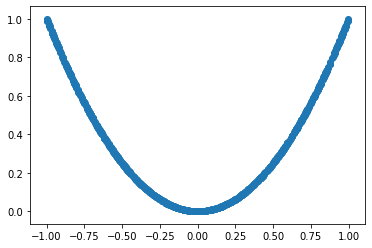

In [28]:
# x, y kirajzolása. Ellenőrzés.
plt.scatter(x_train[:1000],y_train[:1000])
plt.show()

In [6]:
# x négyzetet aproximáló modell létrehozása
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

input_shape = (1,)

model = models.Sequential()
model.add(layers.Dense(64, input_shape=input_shape)) 
model.add(layers.Dense(32, activation='tanh'))  
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss="mse",
              optimizer="adam",
              metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Tanulási görbéket kirajzoló függvény
def plot_history(history):
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(mae) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, mae, 'b', label='Training mae')
    plt.plot(x, val_mae, 'r', label='Validation mae')
    plt.title('Training and validation mae')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

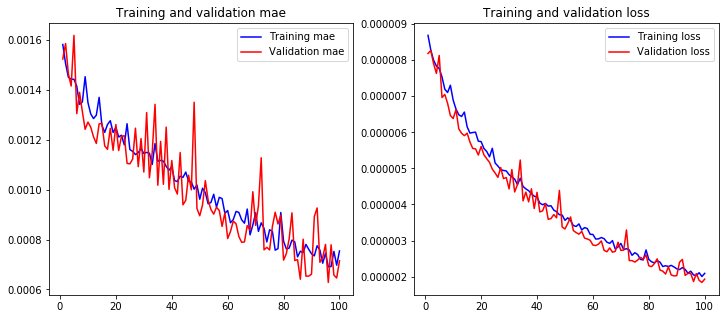

In [30]:
# Modell tanítása
h = model.fit(x=x_train, 
              y=y_train,
              batch_size=1000,
              epochs=100,
              verbose=0,
              validation_data=(x_test, y_test))

plot_history(h)

In [31]:
# Modell helyeségének ellenőrzése
print(model.predict([0.5, -0.5]))

[[0.25014243]
 [0.2507617 ]]


In [32]:
# Torzított x négyzet függvény. Véletlen értékkel elrontja a x négyzet értékét.
# x = (x^2 + z) ahol z szabad paraméter
def func_with_noise(x1):
    z = np.random.rand(1)[0]
    return x1**2 + z

In [33]:
# Véletlen elemek generálása a [-1,1] intervallumon a (x^2 + z) függvénnyel. 
n = 1000
x_new_train =  (np.random.rand(n,1) - 0.5) * 2
y_new_train = np.zeros((n,))

x_new_test =  (np.random.rand(n,1) - 0.5) * 2
y_new_test = np.zeros((n,))

for i in range(n):
    y_new_train[i] = func_with_noise(x_new_train[i])

for i in range(n):
    y_new_test[i] = func_with_noise(x_new_test[i])

print(x_new_train[:10])
print(y_new_test[:10])

[[-0.84264705]
 [ 0.09684363]
 [-0.02808275]
 [ 0.30502861]
 [-0.80350659]
 [ 0.89340257]
 [ 0.3746848 ]
 [-0.68151526]
 [ 0.48198931]
 [-0.28950588]]
[0.56692619 0.78678757 1.57005876 0.21194715 1.30297142 0.70585688
 0.87336933 1.56080036 1.34365887 1.53856382]


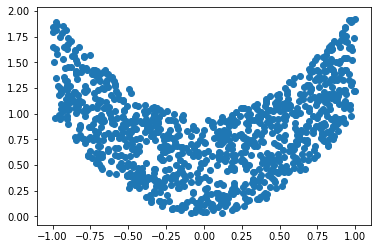

In [34]:
# x, y kirajzolása. Ellenőrzés.
plt.scatter(x_new_train,y_new_train)
plt.show()

In [35]:
# Alap modell készítése a toríztott adatokhoz.
input_shape_new = (1,)

model_new = models.Sequential()
model_new.add(layers.Dense(2, activation='tanh', input_shape=input_shape_new))  
model_new.add(layers.Dense(1, activation='sigmoid'))

model_new.compile(loss="mse",
                  optimizer="adam",
                  metrics=['mae'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


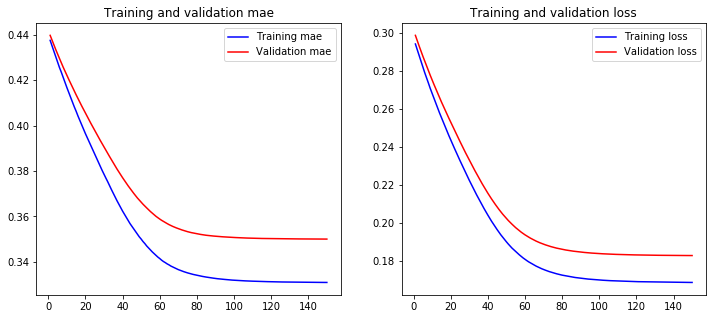

In [36]:
# Alap modell tanítása a (x^2 + z) adatokon
h_new = model_new.fit(x=x_new_train, 
                      y=y_new_train,
                      batch_size=100,
                      epochs=150,
                      verbose=0,
                      validation_data=(x_new_test, y_new_test))

plot_history(h_new)

In [37]:
# Alap modell pontossága a (x^2 + z) adatokon
model_new.evaluate(x=x_new_test, 
                   y=y_new_test,
                   batch_size=100,
                   verbose=0)

[0.18275137692689897, 0.35003912]

In [38]:
# x négyzetett aproximáló modell pontossága a torzított adatokon
model.evaluate(x=x_new_test, 
               y=y_new_test,
               batch_size=100,
               verbose=0)

[0.33993070423603056, 0.5040193]

In [39]:
# Összekapcsolt modell készítése amely együtt dolgozik az x négyzetett aproximáló modellel
layer_input = layers.Input(shape=(1,))
model.trainable = False
x = model(layer_input, training=False)
x = layers.Dense(2, activation='tanh')(x)  
output = layers.Dense(1, activation='sigmoid')(x)
model_concate = models.Model(layer_input, output)

model_concate.compile(loss="mse",
                  optimizer="adam",
                  metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,482
Trainable params: 2,241
Non-trainable params: 2,241
_________________________________________________________________


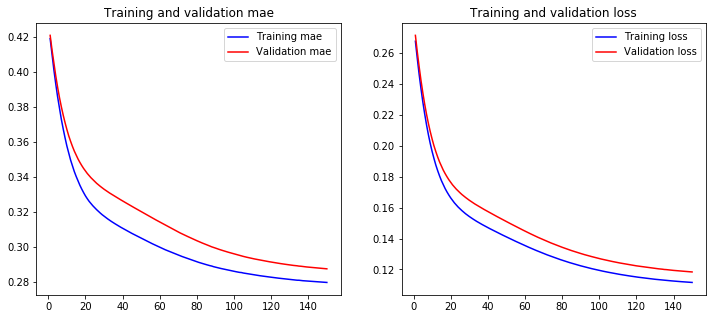

In [40]:
# Összekapcsolt modell tanítása a torzított adatokon
h_concat = model_concate.fit(x=x_new_train, 
                             y=y_new_train,
                             batch_size=50,
                             epochs=150,
                             verbose=0,
                             validation_data=(x_new_test, y_new_test))

plot_history(h_concat)

In [41]:
# Összekapcsolt modell pontossága a torzított adatkon
model_concate.evaluate(x=x_new_test, 
                       y=y_new_test,
                       batch_size=150,
                       verbose=0)

[0.1183986522257328, 0.28746969]

In [ ]:
# Konklúzió:

# Hálózatok pontossága x^2+z függvényen [mean squared error, mean absolute error]

# x^2-et aproximáló hálózat: mse: 0.3399307042360305    mae: 0.5040193 
# Alap hálózat:              mse: 0.18275137692689897   mae: 0.3500391 
# Alpa+Aproximáló hálózat:   mse: 0.1183986522257328   mae: 0.28746969

# Az összekapcsolt modell jobb tehát van olyan esett ahol egy aproximáló hálózat 
# feljavítja egy másik hálózat teljesítményét még pedig úgy, hogy sem az 
# aproximáló hálózat sem az alap hálózat külön küllőn nem képes jobb teljesítményre. 
# Összekapcsolásuk így hatékonyabb.    
